In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dlsfunctions as dls
import initialization_data as init

In [2]:
def generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, mie_fract):
    f1 = 1/(sigma1*np.sqrt(2*np.pi**2))*np.exp(-(d-mean1)**2/(2*sigma1**2))
    f1 = f1* dls.normalize(f1, 1, d[1] - d[0])
    
    f2 = 1/(sigma2*np.sqrt(2*np.pi**2))*np.exp(-(d-mean2)**2/(2*sigma2**2))
    f2 = f2 * dls.normalize(f2, 1, d[1] - d[0])
    
    f = f1 + f2
    f = f * dls.normalize(f, 1, d[1] - d[0])
    return f

In [9]:
d = init.get_distance()

mean1 = init.get_left_mean() + 1e-9
sigma1 = init.get_narrow_sigma()

mean2 = init.get_right_mean()
sigma2 = init.get_narrow_sigma()

c = init.c
m = init.m
beta = init.beta

f = generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, c)
noise = np.random.normal(mean1, sigma1, 200)*1e8

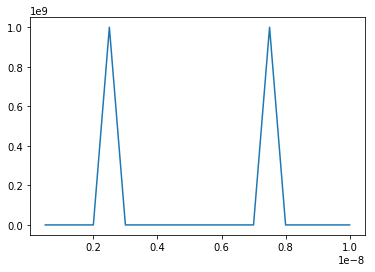

In [5]:
plt.plot(d,f)

In [ ]:
dls.check_distribution_norm(f, d[1] - d[0])

In [10]:
time = init.get_log_time()
gamma = init.get_gamma()

In [11]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise

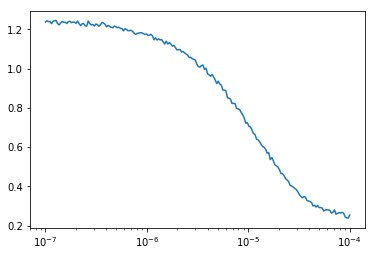

In [12]:
plt.semilogx(time, sim_data)

In [13]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [14]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.363, 0.3  , 0.295, 0.312, 0.361, 0.338, 0.338, 0.352, 0.334,
       0.333, 0.325, 0.329, 0.339, 0.32 , 0.272, 0.327, 0.353, 0.351,
       0.35 , 0.331, 0.345, 0.327, 0.345, 0.349, 0.306, 0.352, 0.328,
       0.332, 0.331, 0.369, 0.341, 0.354, 0.33 , 0.312, 0.33 , 0.338,
       0.348, 0.348, 0.353, 0.325, 0.309, 0.34 , 0.371, 0.317, 0.337,
       0.35 , 0.344, 0.334, 0.348, 0.335, 0.36 , 0.339, 0.338, 0.334,
       0.347, 0.326, 0.349, 0.312, 0.332, 0.335, 0.384, 0.313, 0.333,
       0.352, 0.328, 0.312, 0.326, 0.332, 0.359, 0.351, 0.317, 0.348,
       0.302, 0.311, 0.322, 0.304, 0.359, 0.321, 0.347, 0.32 , 0.3  ,
       0.374, 0.315, 0.334, 0.286, 0.354, 0.335, 0.306, 0.359, 0.353,
       0.306, 0.304, 0.297, 0.347, 0.347, 0.293, 0.319, 0.332, 0.32 ,
       0.31 ])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


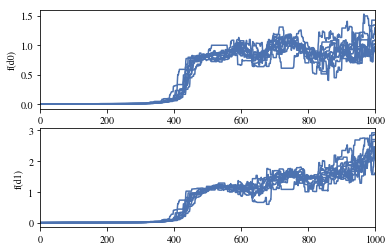

In [15]:
dls.view_burnin_plot(result, 0, 1)

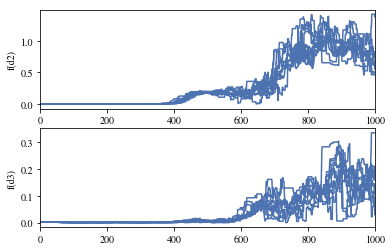

In [16]:
dls.view_burnin_plot(result, 2, 3)

In [17]:
chained_sampler = dls.chain(result, 850, ndim)

In [18]:
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,0.927315,1.747594,1.475336,0.113597,0.294484,1.727084,1.000000e+09,0.338528,0.746172,0.456571,0.117794,0.420865,0.851662,0.159376,1.000000e+09,0.428602,0.041922,0.163221,1.177104,0.380136


In [19]:
infer = np.zeros(20)
infer[0] = 0.927315
infer[1] = 1.747594
infer[2] = 0.851662
infer[3] = 0.159376
infer[4] = 1.000000e+09
infer[5] = 0.428602
infer[6] = 0.041922
infer[7] = 0.163221
infer[8] = 1.177104
infer[9] = 0.380136
infer[10] = 1.475336
infer[11] = 0.113597
infer[12] = 0.294484
infer[13] = 1.727084
infer[14] = 1.000000e+09
infer[15] = 0.338528
infer[16] = 0.746172
infer[17] = 0.456571
infer[18] = 0.117794
infer[19] = 0.420865

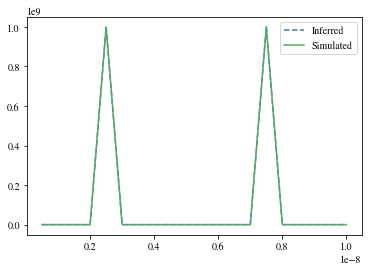

In [26]:
plt.plot(d, infer, '--', label='Inferred')
plt.plot(d, f, label='Simulated')
plt.legend()

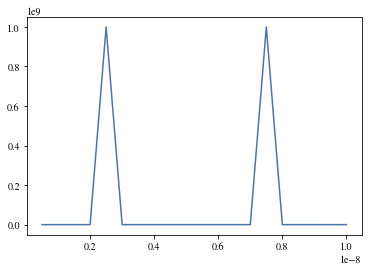

In [21]:
plt.plot(d, f)

In [22]:
beta_post = dls.get_beta(chained_sampler, ndim)

In [23]:
betaq = beta_post.quantile([0.5], axis=0)
betaq

,beta
0.5,1.572663


In [24]:
theta_infer = np.append(infer, 1.572663)
inferg2 = dls.g2(theta_infer, d, m, gamma, time)

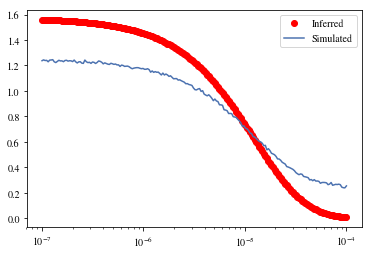

In [25]:
plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()